### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
#reading the needed files
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [2]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [3]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [4]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1


**What percentage of the users use same station as start and end?**

In [5]:
#installing needed library
install.packages('magrittr')
library(magrittr)

package 'magrittr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'magrittr'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\idaya\.conda\envs\r\Lib\R\library\00LOCK\magrittr\libs\x64\magrittr.dll to C:\Users\idaya\.conda\envs\r\Lib\R\library\magrittr\libs\x64\magrittr.dll: Permission denied"Warning message:
"restored 'magrittr'"


The downloaded binary packages are in
	C:\Users\idaya\AppData\Local\Temp\RtmpUXHp7Q\downloaded_packages


Warning message:
"package 'magrittr' was built under R version 3.6.3"

In [6]:
#making the columns have same levels
fac1 = ny %>% as.matrix %>% as.vector %>% unique
ny1 = data.frame(lapply(ny, factor, levels = fac1[!is.na(fac1)]))

fac2 = wash %>% as.matrix %>% as.vector %>% unique
wash1 = data.frame(lapply(wash, factor, levels = fac2[!is.na(fac2)]))

fac3 = chi %>% as.matrix %>% as.vector %>% unique
chi1 = data.frame(lapply(chi, factor, levels = fac3[!is.na(fac3)]))

In [7]:
#adding a new column to indicate if the user used same station for start and end.
ny1$same.station = (ny1$Start.Station == ny1$End.Station)
wash1$same.station = (wash1$Start.Station == wash1$End.Station)
chi1$same.station = (chi1$Start.Station == chi1$End.Station)

In [8]:
head(ny1)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,same.station
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,NA,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,FALSE
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,NA,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,FALSE
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,NA,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,FALSE
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,NA,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,FALSE
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,NA,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,FALSE
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,NA,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,FALSE


In [9]:
head(wash1)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,same.station
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,NA,14th & Belmont St NW,15th & K St NW,Subscriber,FALSE
NA,2017-03-11 10:40:00,2017-03-11 10:46:00,NA,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,FALSE
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,NA,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber,FALSE
NA,2017-04-02 07:48:35,2017-04-02 08:19:03,NA,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer,FALSE
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,NA,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber,FALSE
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,NA,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber,FALSE


In [10]:
head(chi1)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,same.station
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,NA,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992,FALSE
NA,2017-05-25 18:19:03,2017-05-25 18:45:53,NA,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992,FALSE
NA,2017-01-04 08:27:49,2017-01-04 08:34:45,NA,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981,FALSE
NA,2017-03-06 13:49:38,2017-03-06 13:55:28,NA,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986,FALSE
NA,2017-01-17 14:53:07,2017-01-17 15:02:01,NA,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975,FALSE
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,NA,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990,FALSE


In [11]:
#creatiing a new dataframe to show percentage of same station users and different station users
#df1 for ny, df2 for wash, df3 for chi
df1 <- data.frame(value = c((dim(subset(ny1, same.station == 1))[1]), (dim(subset(ny1, same.station == 0))[1])),
                 title = c('Same station', 'different stations'))
df1$percentage <- round((df1$value/sum(df1$value)*100), digits = 2)


df2 <- data.frame(value = c((dim(subset(wash1, same.station == 1))[1]), (dim(subset(wash1, same.station == 0))[1])),
                 title = c('Same station', 'different stations'))
df2$percentage <- round((df2$value/sum(df2$value)*100), digits = 2)


df3 <- data.frame(value = c((dim(subset(chi1, same.station == 1))[1]), (dim(subset(chi1, same.station == 0))[1])),
                 title = c('Same station', 'different stations'))
df3$percentage <- round((df3$value/sum(df3$value)*100), digits = 2)

In [12]:
df1

value,title,percentage
5707,Same station,1.9
294293,different stations,98.1


In [13]:
df2

value,title,percentage
12124,Same station,4.04
287876,different stations,95.96


In [14]:
df3

value,title,percentage
9373,Same station,3.12
290627,different stations,96.88


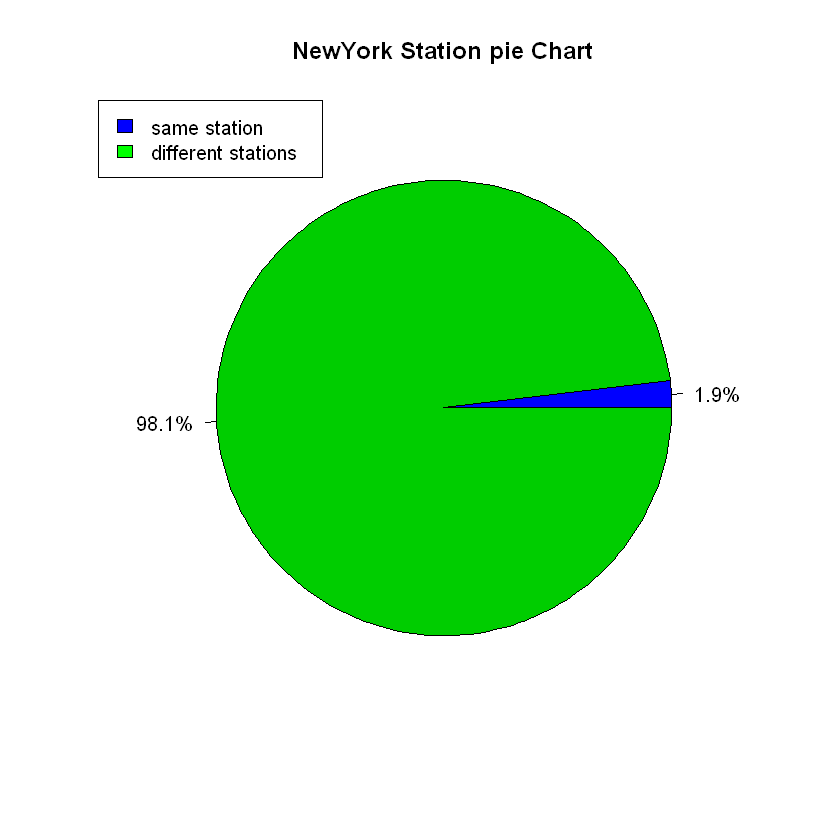

In [15]:
#Using a pie chart for visualization
pie(df1$percentage, labels = paste0(df1$percentage, "%"),col = 4:3,main = "NewYork Station pie Chart")
  legend("topleft", legend = c("same station", "different stations"),
       fill =  c("blue", "green"))

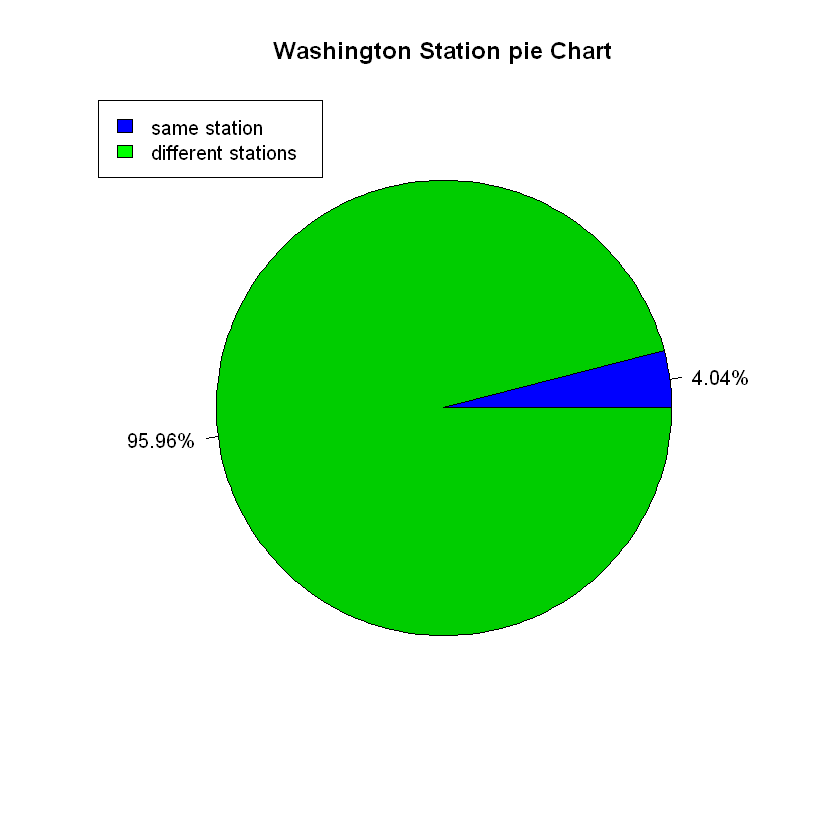

In [16]:
pie(df2$percentage, labels = paste0(df2$percentage, "%"),col = 4:3,main = "Washington Station pie Chart")
  legend("topleft", legend = c("same station", "different stations"),
       fill =  c("blue", "green"))

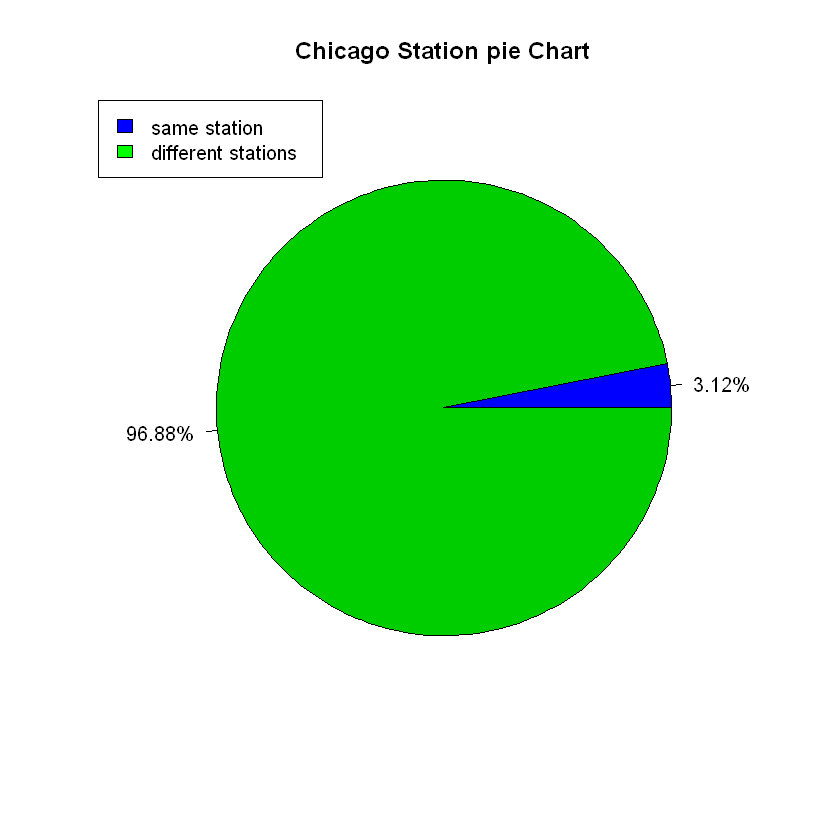

In [17]:
pie(df3$percentage, labels = paste0(df3$percentage, "%"),col = 4:3,main = "Chicago Station pie Chart")
  legend("topleft", legend = c("same station", "different stations"),
       fill =  c("blue", "green"))

**For all three cities, less than 5% of the users used same station as start and end. This implies that, the bikeshare business may not be successful if users were not given the option of starting and ending their trips at different stations.**

### Question 2

**What is the relationship between age and trip duration?**

In [18]:
#creating new table to exclude rows with Birth.Year as NA and to create a new column for age (chicago and new york)
ny2 = subset(ny, !is.na(Birth.Year))
chi2 = subset(chi, !is.na(Birth.Year))

ny2$age = (2017 - ny2$Birth.Year)
chi2$age = (2017 - chi2$Birth.Year)

In [19]:
head(ny2)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,age
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,19
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,36
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,30
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,31
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,25
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,31


In [20]:
head(chi2)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,age
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992,25
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992,25
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981,36
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986,31
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975,42
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990,27


In [21]:
#installing required package
install.packages('ggplot2')
library(ggplot2)


  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE



installing the source package 'ggplot2'



In [22]:
#getting data summary to determine axis limits
summary(ny2$age)
summary(ny2$Trip.Duration/3600)
summary(chi2$age)
summary(chi2$Trip.Duration/3600)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.00   29.00   36.00   38.75   47.00  132.00 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0169   0.0981   0.1589   0.2227   0.2661 598.8264 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   28.00   33.00   36.14   42.00  118.00 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.01667  0.09750  0.15694  0.19426  0.24972 23.81722 

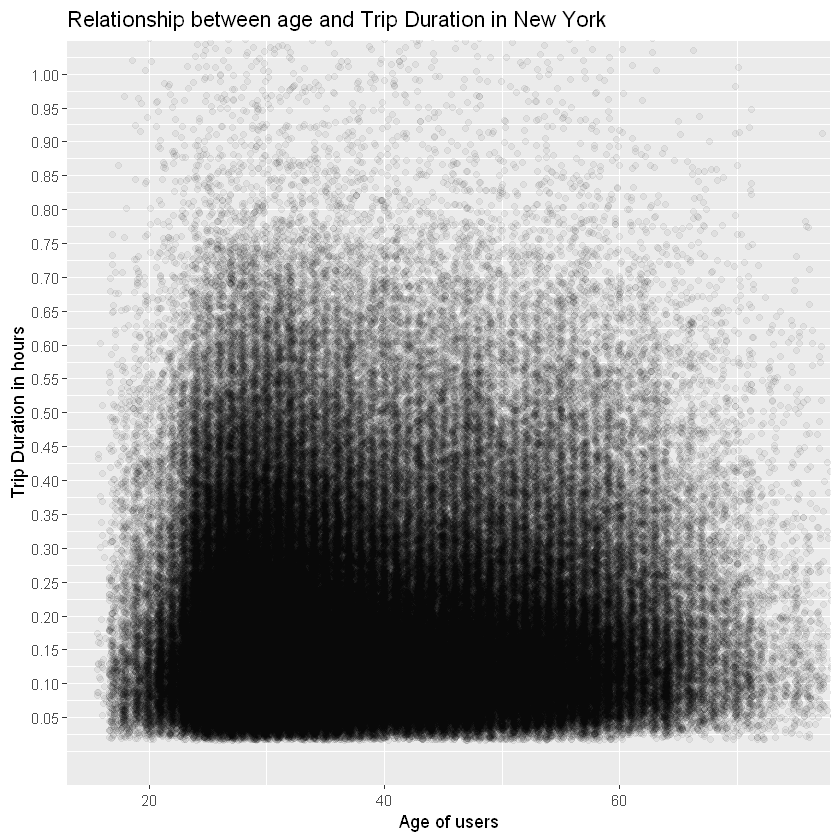

In [23]:
#Scatterplot for new york
ggplot(aes(x=age, y=Trip.Duration/3600), data = ny2)+
    geom_point(alpha = 0.05, position = position_jitter (h=0))+
    coord_cartesian(xlim = c(16,75), ylim = c(0,1.0))+
    scale_y_continuous(breaks = seq(0.05,1,0.05))+
    ggtitle('Relationship between age and Trip Duration in New York')+
    labs(x = 'Age of users', y = 'Trip Duration in hours')

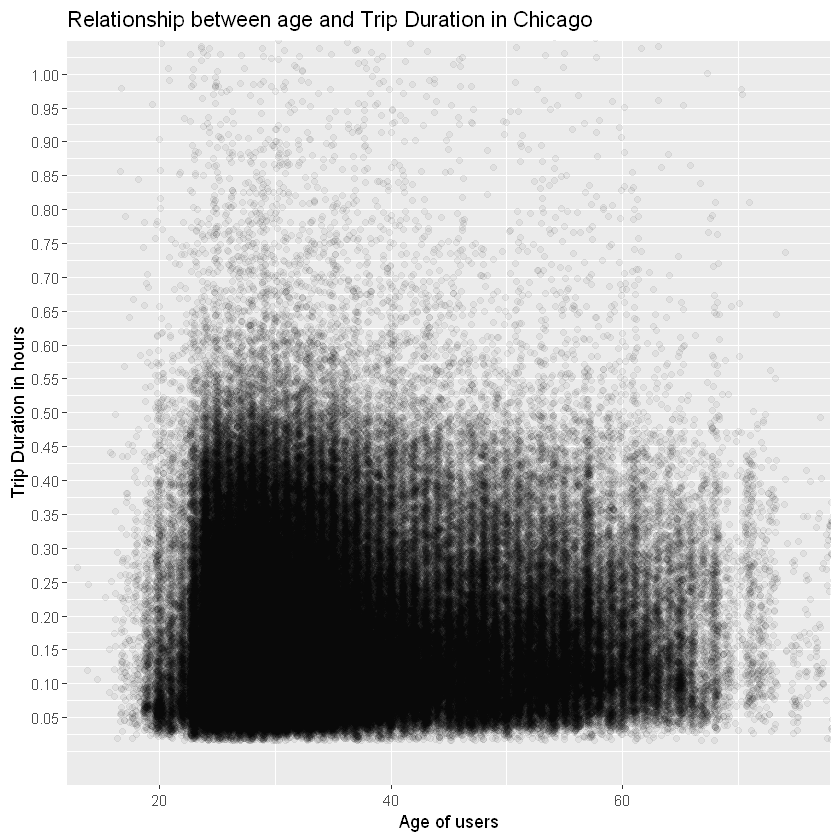

In [24]:
#Minimum age for Chicago (1) will be ignored as it can be an error, because a 1yr old child cannot ride a bike
#Scatterplot for Chicago
ggplot(aes(x=age, y=Trip.Duration/3600), data = chi2)+
    geom_point(alpha = 0.05, position = position_jitter (h=0))+
    coord_cartesian(xlim = c(15,75), ylim = c(0,1.0))+
    scale_y_continuous(breaks = seq(0.05,1,0.05))+
    ggtitle('Relationship between age and Trip Duration in Chicago')+
    labs(x = 'Age of users', y = 'Trip Duration in hours')

**For both cities, there is an increase in trip duration from around age 16 to like 25. Then a reduction in trip duration from around age 30. This proves that users in the early 20s ride more than teens and users above 30.**

### Question 3

**What is the relationship between gender and trip duration?**

Warning message:
"Removed 2727 rows containing non-finite values (stat_bin)."Warning message:
"Removed 6 rows containing missing values (geom_bar)."

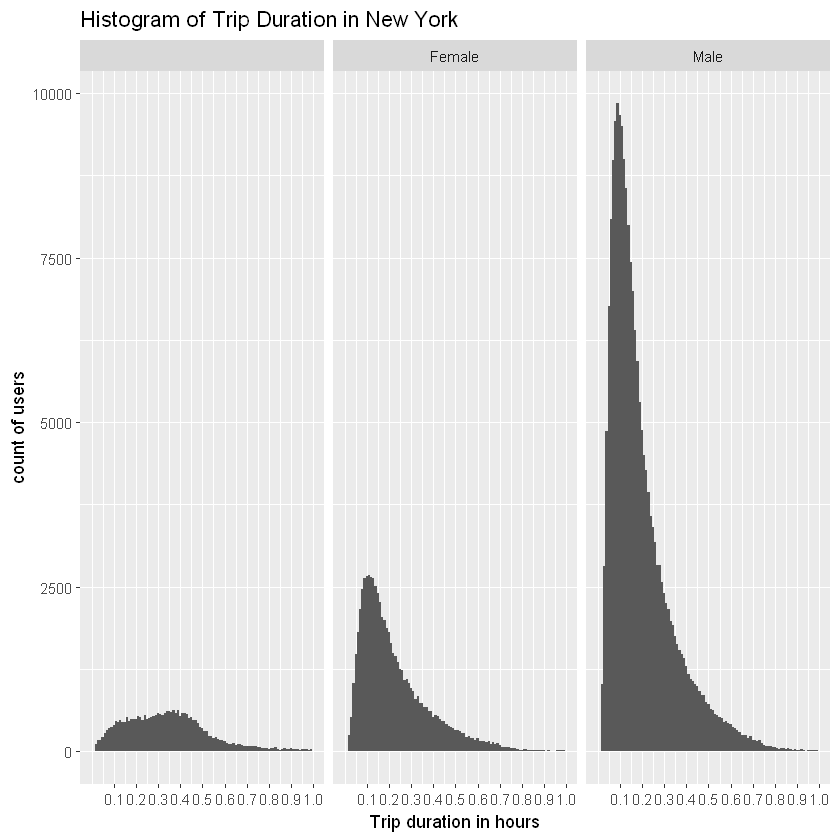

In [25]:
#Histogram of Trip Duration in hours by Gender for new york
qplot(x = (Trip.Duration/3600), data = subset(ny, !is.na(Gender)), binwidth = 0.01)+
    scale_x_continuous(lim = c(0,1.0), breaks = seq(0.1,1,0.1))+
    facet_wrap(~ Gender)+
    ggtitle('Histogram of Trip Duration in New York')+
    labs(x = 'Trip duration in hours', y = 'count of users')

Warning message:
"Removed 5893 rows containing non-finite values (stat_bin)."Warning message:
"Removed 6 rows containing missing values (geom_bar)."

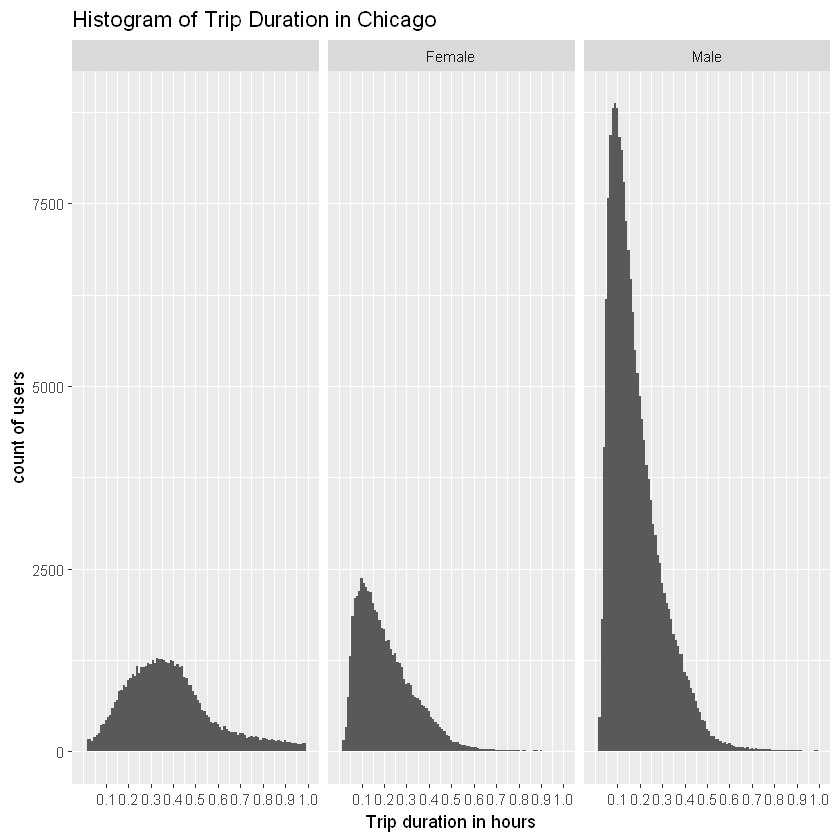

In [26]:
#Histogram of Trip Duration in hours by Gender for chicago
qplot(x = (Trip.Duration/3600), data = subset(chi, !is.na(Gender)), binwidth = 0.01)+
    scale_x_continuous(lim = c(0,1.0), breaks = seq(0.1,1,0.1))+
    facet_wrap(~ Gender)+
    ggtitle('Histogram of Trip Duration in Chicago')+
    labs(x = 'Trip duration in hours', y = 'count of users')

In [27]:
#to get the count of male and female in each data
table(ny$Gender)
table(chi$Gender)


       Female   Male 
 29209  66783 204008 


       Female   Male 
 61052  57758 181190 

In [28]:
#Summary of Trip Duration for each gender for new york
by((ny$Trip.Duration), ny$Gender, summary)

ny$Gender: 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     61     754    1240    1811    1711  499410 
------------------------------------------------------------ 
ny$Gender: Female
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    61.0    401.0    652.0    886.7   1086.0 332970.0 
------------------------------------------------------------ 
ny$Gender: Male
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     61.0     339.0     548.0     773.5     916.0 2155775.0 

In [29]:
#Summary of Trip Duration for each gender for chicago
by((chi$Trip.Duration), ny$Gender, summary)

ny$Gender: 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   392.0   672.0   948.6  1127.0 82230.0 
------------------------------------------------------------ 
ny$Gender: Female
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   392.0   672.0   928.8  1128.0 82654.0 
------------------------------------------------------------ 
ny$Gender: Male
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   393.0   670.0   936.9  1124.0 86224.0 

**In both cities, for both male and female, the distribution of trip duration is relatively same. This implies that trip duration is not dependent on Gender. However, it can be noticed that the count of males is signicantly higher than that of females. This implies that there are more male riders than females.**